# Neural Network Training

## Loss Function

### Mean Squared Error

$$
MSE = \frac{1}{2}\sum_{k}(y_i - \hat{y}_i)^2
$$

`k` is the number of output neurons

y = [0.1, 0.05, 0.6, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.0]

t = [0,   0,    1,   0,   0,   0,   0,   0,    0,   0]

In this case, the index of the highest value in the output layer is 2. 

Therefore, the correct answer is 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(t), np.array(y))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.5, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.7225

### cross entropy err


$$
E = -\sum_{k} t_k \log y_k
$$

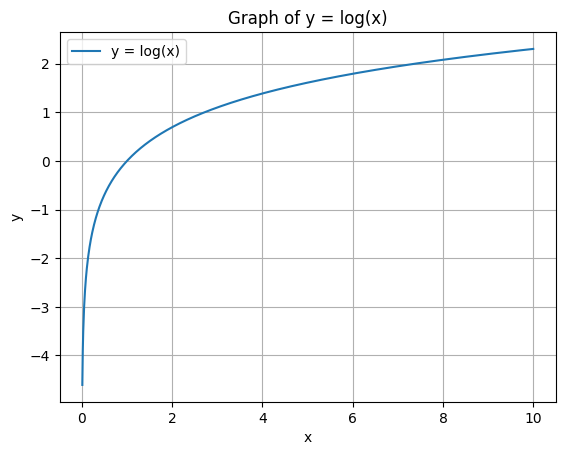

In [5]:
# 自然対数 y = log(x) のグラフを描画する
# xの値の範囲を定義
x = np.linspace(0.01, 10, 1000)

# y = log(x) の計算
y = np.log(x)

# グラフの描画
plt.plot(x, y, label="y = log(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of y = log(x)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.8, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

#### mini batch

$$

E = \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log {y}_{nk}

$$

- N: number of data
- t: one-hot vector
- y: output of softmax function
- k: index of output layer
- n: index of data
- $t_{nk}$: 1 if $n$-th data is $k$-th class, 0 otherwise
- $y_{nk}$: output of softmax function of $n$-th data for $k$-th class
- $E$: cross entropy error
- $E_n$: cross entropy error of $n$-th data
- $E_n = - \sum_{k} t_{nk} \log {y}_{nk}$
- $E = \frac{1}{N} \sum_{n} E_n$
- $E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log {y}_{nk}$


#### get mnist data

In [14]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [15]:
print(f'x train shape: {x_train.shape}')
print(f't train shape: {t_train.shape}')

x train shape: (60000, 784)
t train shape: (60000, 10)


In [16]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [17]:
np.random.choice(60000, 10, replace=False)

array([30682, 56874, 49398, 45422, 45341, 22443, 42864, 16229, 14890,
       32431])

In [18]:
def cross_entropy_error_with_batch_size(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [19]:
def cross_entropy_error_with_batch_size_and_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size